In [1]:
import numpy as np
from scipy.stats import binom, uniform, poisson

бросок нессиметричных монет

In [14]:
def f1(p, q, n):
    fst = binom(n, p)
    E_XI = p**2 * n
    Var_XI = E_XI * p * q
    print(f'мат ожидание равно:  {E_XI}')
    print("E(2го броска | 1го броска):", fst.mean() * p)
    print("D(E(2го броска | 1го броска)):", fst.var() * p**2)
    print("E(D(2го броска | 1го броска)):", fst.mean() * p * q)

пожар

In [16]:
# X - ущерб от пожара, Y - число пожаров в год
def f4(EX, EY):
    VarY = EY
    VarX = EX**2
    ES = EX * EY
    VarS = VarX * EY + VarX * VarY
    return ES, VarS**(0.5)

страхование

In [17]:
def f5(minu, maxu, EY):
    EX = (maxu + minu)/2
    VarX = (maxu - minu)**2/12
    VarY = EY
    ES = EX * EY
    VarS = EX**2 * EY + VarX * VarY
    return ES, VarS**(0.5)

цена

In [18]:
def f6(y1, y2, p1, p2, a, b):
    EY = y1*p1 + y2*p2
    EX = (a + b*y1)/2 * p1 + (a+b*y2)/2 * p2
    print(EX)
    EXY = y1*(a + b*y1)/2 * p1 + y2*(a+b*y2)/2 * p2
    Cov = EXY - EX*EY
    return EXY, Cov

игральная кость

In [19]:
def igr_kost(n, k):
    p8o = binom(n, 0.5).pmf(k)
    geom_var = (1-p8o)/(p8o**2)
    geom_mean = 1/p8o
    km = uniform(1, 5).mean()
    kv = ((1**2 + 2**2 + 3**2 + 4**2 + 5**2 + 6**2) / 6 ) - km**2

    print("E(S):", 1/p8o * km)
    print("Sigma(S):", ((km**2)*geom_var + kv*geom_mean)**0.5)

In [21]:
import numpy as np
from sympy import *
from scipy.stats import *

оценки

In [22]:
def f1(marks):
    A = [i for i in marks if i > 0]
    M = np.median(A)
    H = len([i for i in A if i >= M])/sum(1/i for i in A if i >= M)
    G = gmean([i for i in A if i >= M])
    Q = np.median([i for i in A if i >= M])
    N = len([i for i in marks if Q<=i<=H])
    print(f'средняя положительная оценка: {np.mean(A)}', f'M - медиана полож. оценок: {M}', f'H - среднее гармоническое: {H}',
          f'G - среднее геометрическое: {G}', f'Q-медианная оценка, где студенты набрали нее менее М: {Q}', 
          f'N - количество студентов (оценки между H и Q): {N}', sep='\n')

эмпирическая ФР

In [23]:
import statsmodels.api as sm 
def f2(abc):
    abc = np.array(abc)
    mu = np.mean(abc)
    sigma = abc.std()
    X = norm(mu, sigma)
    L = X.ppf(0.25)
    H = X.ppf(0.75)
    kol = len([i for i in abc if L<i<H])
    ecdf = sm.distributions.ECDF(ABC)
    d_max = 0
    for x in ABC:
        d = abs(ecdf(x) - X.cdf(x))
        if d > d_max:
            d_max = d
    print(f'ср. арифметическое: {mu}', f'эмп. ст. отклонение: {sigma}', f'квартили L: {L}', f'H: {H}',
        f'количество ПД, попавших в интервал от L до H: {kol}', f'максимальное расстояние между функциями: {d_max}', sep='\n')

студенты x1y1

In [24]:
def f3(xy):
    xy = xy.replace('\n', '').split(',')
    lst = []
    lx, ly = [], []
    for i in range(len(xy)):
        lst.append(int(xy[i].split('=')[1].strip()))
    for j in range(0,len(lst),2):
        if lst[j] >= 50 and lst[j+1] >= 50:
            lx.append(lst[j])
            ly.append(lst[j+1])
    print(f'cov: {np.cov(np.array(lx), np.array(ly), bias=True)[0][1]}', 
          f'corr: {np.corrcoef(np.array(lx), np.array(ly))[0][1]}', sep='\n')

поток состоит из

In [25]:
def f4(n1, n2, n3, x1s, x2s, x3s, sgm1, sgm2, sgm3):
    Xs = (n1*x1s + n2*x2s + n3*x3s)/(n1+n2+n3)
    sigma_m = 1/(n1+n2+n3) * (n1*(x1s - Xs)**2 + n2*(x2s - Xs)**2 + n3*(x3s - Xs)**2)
    sigma_v = (n1*sgm1**2 + n2*sgm2**2 + n3*sgm3**2)/(n1+n2+n3)
    sigma = (sigma_m + sigma_v)
    stdot = sigma**(0.5)
    return Xs, stdot

в группе учатся

In [26]:
# моменты
def f5(marks, n):
    return np.var(marks)/n, moment(marks, 3)/n**2

In [27]:
# среднее
def f6(marks,N, n):
    return np.mean(marks), np.var(marks)/n * (N - n )/(N - 1)

распределение баллов на экзамене

In [28]:
def f7(N,pr, n1, n2, n3, n4): 
    n = N/pr
    lst = np.array([2]*n1 + [3]*n2 + [4]*n3 + [5]*n4)
    m = np.mean(lst)
    v = np.var(lst)/n * (N-n)/(N-1)
    return m, v**(.5)

две игральные кости

In [29]:
def f8(N,n):
    EX = 11*1/6*sum(range(1,7)) + (-9)*1/6*sum(range(1,7))
    Varx = (1/6*sum(list(i**2 for i in range(1,7))) - (1/6*(sum(range(1,7))))**2) 
    VarX = (N-n)/(N-1)/n * (11**2 * Varx + 9**2 *Varx)
    return EX, VarX**(.5)

монеты

In [30]:
def f9(coins,n):
    EX = coins * 0.5 
    Varx = 1/2 - (1/2)**2
    VarX = coins *Varx * (1/n) * (2**coins - n)/(2**coins - 1)
    return EX, VarX

эмпирическое распределение признаков

In [31]:
def f11(arr: list, x: list, y: list, n: int, N: int):
    X = np.array([x, [sum(arr[0]), sum(arr[1])]])
    Y = np.array([y, [sum(arr[:, 0]), sum(arr[:, 1]), sum(arr[:, 2])]])
    
    X_d = rv_discrete(values=(X[0], X[1]))
    Y_d = rv_discrete(values=(Y[0], Y[1]))
    
    EX = X_d.mean()
    Var_X = X_d.var()/n * (N - n)/(N - 1)
    
    EY = Y_d.mean()
    Var_Y = Y_d.var()/n * (N - n)/(N - 1)
    
    EXY = 0
    for i in range(len(x)):
        for j in range(len(y)):
            EXY += x[i] * y[j] * arr[i, j]
    CovXY = (EXY - EX*EY)/n * (N - n)/(N - 1)
        
    Corr = (EXY - EX*EY) / ((X_d.var())**0.5 * (Y_d.var())**0.5)
    return f'EX = {(EX)}\nVar_Y = {(Var_Y)}\nCorr = {(Corr)}\n------\nEY = {(EY)}\nSigma_X = {(Var_X**0.5)}\nCov_XY = {(CovXY)}'

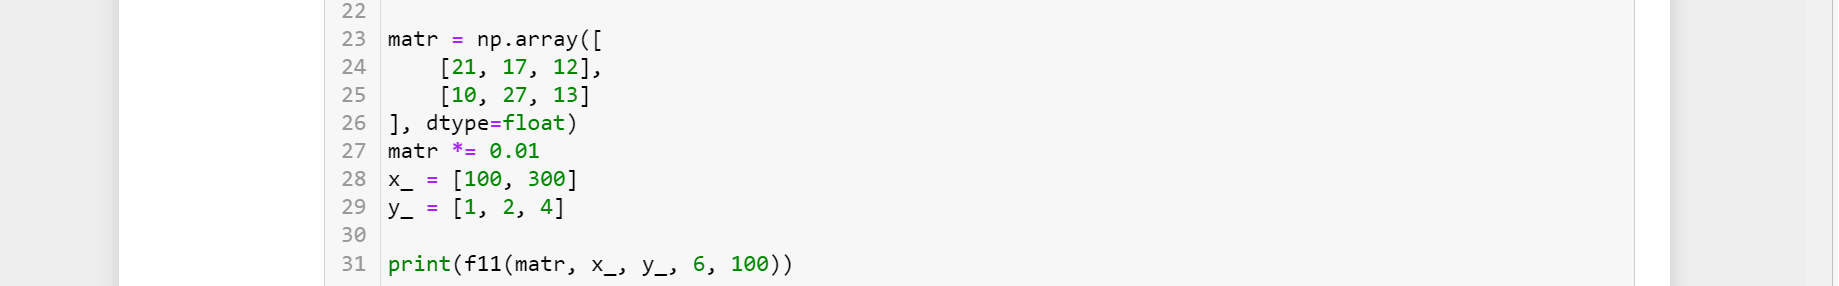

In [2]:
from sympy import *
import numpy as np
from scipy.stats import *
from math import tanh, atanh # гиперболический тангенс
import scipy.optimize as opt
import re
from functools import reduce
from scipy.optimize import fsolve

def correct(data):
    mask = re.sub(r'[,]', '.', data).split('; ')
    sample = np.array(list(map(float, mask)))
    return sample

In [4]:
def Z_test_one_sample(data, alpha, sigma, mu0):
    mn = np.mean(data) # выборочное среднее
    Z_st = (mn - mu0)/sigma*len(data)**0.5
    cvalue = norm.isf(alpha/2) # |Z_st| > Z_alpha/2 - промежуток (-oo,-cvalue)U(cvalue, +oo)
    pvalue = 2*(1 - norm.cdf(abs(Z_st))) # pv = 0.5 - Ф0 = 0.5 - (cdf(x) - 0.5) = 1 - cdf(x)
    return f'Z-статистика: {Z_st}, Крит.об: {cvalue}, pvalue: {pvalue}'

def betta(data, alpha, sigma, mu0, mu1):
    n = len(data)
    betta = norm.cdf(norm.isf(alpha/2) - n**.5*(mu1 - mu0)/sigma) - 0.5 + \
    norm.cdf(norm.isf(alpha/2) + n**.5*(mu1 - mu0)/sigma) - 0.5
    W = 1 - betta
    return betta, W

In [5]:
def T_test_one_sample(data, alpha, mu0):
    S = np.var(data, ddof=True)
    mn = np.mean(data)
    n = len(data)
    T = t(n-1)
    T_st = n**.5*(mn - mu0)/S**.5
    cvalue = T.isf(alpha/2)
    pvalue = 2*(1 - T.cdf(abs(T_st)))
    return f'T-статистика: {T_st}, Крит.об: {cvalue}, pvalue: {pvalue}'

def betta_nct(data, alpha, mu0, mu1):
    S = np.var(data, ddof=True)
    #mn = np.mean(data)
    n = len(data)
    T = t(n-1)
    delta = n**.5*(mu1 - mu0)/S**.5
    G = nct(n-1, delta)
    betta =  G.cdf(T.isf(alpha/2)) - G.cdf(-T.isf(alpha/2))
    W = 1 - betta
    return f'МОЩНОСТЬ КРИТЕРИЯ: {W}'

In [6]:
def chi_test_one_sample(data,alpha, mu, sgm0, sgm1):
    n = len(data)
    S = 1/n*sum((data[i] - mu)**2 for i in range(n))
    chi_st = n*S/sgm0**2
    chi = chi2(n)
    A = chi.isf(1-alpha/2)
    B = chi.isf(alpha/2)
    
    p1 = chi.cdf(chi_st)
    p2 = chi.sf(chi_st)
    pvalue = 2*min(p1, p2)
    
    betta = chi.cdf(sgm0**2/sgm1**2*chi.isf(alpha/2)) - chi.cdf(sgm0**2/sgm1**2*chi.isf(1 - alpha/2))
    return f'статистика: {chi_st}, А: {A}, В: {B}, pvalue: {pvalue}, БЕТТА: {betta}'

In [7]:
def chi_test_one_sample_unknown_mean(data,alpha, sgm0, sgm1):
    n = len(data)
    mu = data.mean()
    S = 1/(n-1)*sum((data[i] - mu)**2 for i in range(n))
    chi_st = (n-1)*S/sgm0**2
    chi = chi2(n-1)
    A = chi.isf(1-alpha/2)
    B = chi.isf(alpha/2)
    
    p1 = chi.cdf(chi_st)
    p2 = chi.sf(chi_st)
    pvalue = 2*min(p1, p2)
    
    betta = chi.cdf(sgm0**2/sgm1**2*chi.isf(alpha/2)) - chi.cdf(sgm0**2/sgm1**2*chi.isf(1 - alpha/2))
    return f'статистика: {chi_st}, А: {A}, В: {B}, pvalue: {pvalue}, BETTA: {betta}'

In [8]:
def Z_test_two_sample(xvec, yvec,alpha, sgmx, sgmy, delta):
    '''ПРОВЕРЬ КРИТ ОБЛАСТЬ'''
    n = len(xvec)
    m = len(yvec)
    Z_st = (np.mean(xvec) - np.mean(yvec))/(sgmx**2/n + sgmy**2/m)**0.5
    
    cvalue = norm.isf(alpha)
    
    pvalue = norm.sf(Z_st)
    
    betta =  norm.cdf(norm.isf(alpha) - (n*m)**.5/(m*sgmx**2+n*sgmy**2)**.5 * delta)
    W = 1 - betta
    
    print(f'Статистика Z: {Z_st}\n P-value: {pvalue}\n c-value: {cvalue}\n W!!!: {W}')

In [10]:
def T_test_two_sample(data):
    """дисперсии неизвестны, но равны"""
    """двусторонняя область"""
    xvec = np.array(data[0].loc[pd.notnull(data[0])])
    yvec = np.array(data[1].loc[pd.notnull(data[1])])
    n = len(xvec)
    m = len(yvec)
    xm, ym = xvec.mean(), yvec.mean()
    Sx, Sy = np.var(xvec, ddof=True), np.var(yvec, ddof=True) # они уже в квадрате
    S2 = (n-1)*Sx/(n+m-2) + (m-1)*Sy/(n+m-2) 
     
    T_st = (xm - ym)/(S2**.5*(1/n + 1/m)**.5)
    T = t(n+m-2)
    pv = 2*(1 - t.cdf(abs(T_st), n+m-2))
    #pv2 = 2*min(T.sf(T_st), T.cdf(T_st))
    return T_st, pv

In [11]:
def welch_test(data):
    xvec = np.array(data[0].loc[pd.notnull(data[0])])
    yvec = np.array(data[1].loc[pd.notnull(data[1])])
    n = len(xvec)
    m = len(yvec)
    xm, ym = xvec.mean(), yvec.mean()
    Sx, Sy = np.var(xvec, ddof=True), np.var(yvec, ddof=True)
    
    T_w = (xm - ym)/(Sx/n + Sy/m)**.5
    f = (Sx/n + Sy/m)**2/(Sx**2/(n**2*(n-1)) + Sy**2/(m**2*(m-1)))
    T = t(f)
    pv = 2*min(T.cdf(T_w), T.sf(T_w))
    return T_w, pv

In [12]:
# H0: varx = vary
# H1: varx != vary
def F_test_two_sample(data, alpha):
    xvec = np.array(data[0].loc[pd.notnull(data[0])])
    yvec = np.array(data[1].loc[pd.notnull(data[1])])
    n = len(xvec)
    m = len(yvec)
    Sx, Sy = np.var(xvec, ddof=True), np.var(yvec, ddof=True)
    
    F_st = Sx/Sy
    F = f(n-1, m-1)
    cv1 = F.isf(1-alpha/2)
    cv2 = F.isf(alpha/2)
    pv = 2*min(F.cdf(F_st), F.sf(F_st))
    
    return F_st, cv1,cv2, pv

In [9]:
from scipy.stats import f
def F_test_three_sample(A, B, C):
    n1 = len(A)
    n2 = len(B)
    n3 = len(C)
    n = n1+n2+n3
    k = 3
    
    amean = A.mean()
    bmean = B.mean()
    cmean = C.mean()

    Sa = np.var(A, ddof=True)
    Sb = np.var(B, ddof=True)
    Sc = np.var(C, ddof=True)

    avar = np.var(A)
    bvar = np.var(B)
    cvar = np.var(C)

    Xm = 1/(n1+n2+n3)*(sum(A)+sum(B)+sum(C))
    Var = 1/(n1+n2+n3)*(sum((A-amean)**2) + sum((B-bmean)**2) + sum((C-cmean)**2)) # средняя выб.дисперсия
    Var2 = 1/n*(avar*n1+bvar*n2+cvar*n3)
    
    SSE = n*Var # внутригрупповая сумма квадратов (=n*(ср.выб.дисп.))
    MSE = SSE/(n-k) # остаточная дисперсия
    delt = 1/n*((amean - Xm)**2*n1 + (bmean - Xm)**2*n2 + (cmean - Xm)**2*n3)
    SSTR = n*delt
    MSTR = SSTR/(k-1)
    
    F_st = MSTR/MSE
    
    F = f(k-1, n-k)
    pvalue = F.sf(F_st)
    
    print(f'Межгрупповая дисперсия: {delt}\n Средняя групповая дисперсия: {Var}\n Статистика F: {F_st}\n p-value: {pvalue}, {Var2}')

In [13]:
def correlation(xvec, yvec, N, gamma):
    alpha = 1 - gamma
    po = np.corrcoef(xvec, yvec)[1][0]
    teta1 = tanh(0.5*ln((1+po)/(1-po)) - norm.isf(alpha/2)/((N-3)**0.5))
    teta2 = tanh(0.5*ln((1+po)/(1-po)) + norm.isf(alpha/2)/((N-3)**0.5))
    return po, teta2

In [ ]:
def func(n):
    d = dict(zip(range(101), n))
    lst = []
    for k, v in d.items():
        lst.append([k/100] * v)
        sample = np.array(reduce(lambda x, y: x + y, lst))
        
    N = len(sample)
    a, b = 1, 1
    mx = N*np.log(a*b) + (a-1)*np.sum(np.log(sample)) + (b-1)*np.sum(np.log(1-np.power(sample, a)))
    for a in range(1, 21):
        for b in range(1, 21):
            logL = N*np.log(a*b) + (a-1)*np.sum(np.log(sample)) + (b-1)*np.sum(np.log(1-np.power(sample, a)))
            if mx < logL:
                mx = logL
                ah = a
                bh = b
    
    x = Symbol('x')
    f = ah*bh*x**(ah - 1)*(1 - x**ah)**(bh - 1)
    EX = integrate(f*x, (x, 0, 1))
    
    return f'A: {ah}, B: {bh}, EX:  {round(EX, 6)}'


#ah = 
#bh = 
x = Symbol('x')
f = ah*bh*x**(ah - 1)*(1 - x**ah)**(bh - 1) # НЕ ЗАБУДЬ МИНУС -0.2
print(integrate(f, x))
# def Func:
#    return 

fsolve(Func, [0.8])